In [1]:
import pandas as pd
import numpy as np
import requests, zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
#r= requests.get()
r=zipfile.ZipFile(('names.zip',mode='r',compression=0,allowZip64=True,compresslevel=None,)
%#r.open()

#pd.read_csv(BytesIO())
#zipfile.ZipFile.read(,name='names.zip')
#pd.read_csv(BytesIO(r), encoding='utf-8', engine='python', header=None)

In [ ]:
from zipfile import ZipFile
with ZipFile('names.zip', 'r') as zip:
    zip.extractall
    data=zip.read()


In [2]:
from zipfile import ZipFile
# z=ZipFile('names.zip',mode='r')
z=ZipFile('names.zip',mode='r')
fn=z.infolist()
# print(fn[0].filename)
lst=[]
lst_year=[]
for i in range(0,len(fn),1):
    if fn[i].filename.endswith('.txt'):
        lst.append(fn[i].filename)
        lst_year.append(fn[i].filename[3:7])
    
# print(lst_year)
#[0].filename
global dfs
dfs = {text_file.filename: pd.read_csv(z.open(text_file.filename))
       for text_file in z.infolist()
       if text_file.filename.endswith('.txt')}

count=0
data1=[]
for lst1 in lst:
    if lst1.endswith('.txt'):
        data=dfs[lst1]
        df1=data.columns
        new_row=pd.DataFrame({df1[0]:df1[0],df1[1]:df1[1],df1[2]:df1[2]},index=[0])
        data=pd.concat([new_row,data]).reset_index(drop=True)
        df2=data.rename(columns={df1[0]:'Name',df1[1]:'Gender',df1[2]:'Count'})
        year=[]
        for i in range(0,len(df2)):
            year.append([lst_year[count]])
        df2['Year']=pd.DataFrame(year)
        data1.append(df2)
        count+=1
#         count+=len(data)

#  no. of male and female
d=data1[0]['Gender'].value_counts()
Male=[]
Female=[]
tot_male=[]
tot_female=[]
j=0
cnt=0
cnt1=0
for i in range(0,len(data1)):
    cnt=0
    Male.append(data1[i]['Gender'].value_counts().M)
    Female.append(data1[i]['Gender'].value_counts().F)

    for j in range (0,len(data1[i])):
        if data1[i]['Gender'][j]=='M':
            val=int(data1[i]['Count'][j])
            cnt+=val
        elif data1[i]['Gender'][j]=='F':
            val1=int(data1[i]['Count'][j])
            cnt1+=val1
    tot_male.append(cnt)
    tot_female.append(cnt1)

print(data1[0]['Gender'].value_counts().F, len(data1[0]),data1[0]['Gender'][0])
print(tot_male[0:5])
df_male= pd.DataFrame(tot_male)
# print(tot_female)
# pd.DataFrame(dict1)
# plt.bar(lst_year[20:40],Male[20:40],color='Orange')
# dict1={'Male':Male,'Female':Female,'Year':lst_year}
# df_plot=pd.DataFrame(dict1)
# df_plot[0:5]
# plt.bar(lst_year[20:40],Female[20:40],color='Blue')


# if s >1879 and s< 2019:
#     data=dfs['yob'+d+'.txt']
#     f = z.open('yob'+d+'.txt')
#     f.read()
#     new_content=['Name','Gender','Count']
#     lines = f.readlines() # read old content
#     f.seek(0) # go back to the beginning of the file
#     f.write("ss") # write new content at the beginning
#     print(lines)
#     for line in lines:
#         f.write(line)
#     f.close()
    
#     print(f)
    #print(data.info())
#     dfs['yob'+d+'.txt'].head()
# else:
#     print('No data available')
# data.loc[0:1] #get rows
# df1=data.columns
# df1[0]
# new_row=pd.DataFrame({df1[0]:df1[0],df1[1]:df1[1],df1[2]:df1[2]},index=[0])
# new_row
# data=pd.concat([new_row,data]).reset_index(drop=True)
# data
# df2=data.rename(columns={'Mary':'Name','F':'Gender','7065':'Count'})
# df2
# df2.dropna()


#https://www.geeksforgeeks.org/working-zip-files-python/

942 2000 F
[110490, 100743, 113686, 104625, 114442]


In [6]:
for i in range(0,len(data1)):
    cnt=0
    Male.append(data1[i]['Gender'].value_counts().M)
    Female.append(data1[i]['Gender'].value_counts().F)
#     while (j <len(data1[i])):
#         if data1[i]['Gender'][j]== 'M':
#             cnt+= int(data1[i]['Count'][j])
#         j+=1
    for j in range (0,len(data1[i])):
        if data1[i]['Gender'][j]=='M':
            val=int(data1[i]['Count'][j])
            cnt+=val
#     print(cnt)

In [7]:
df=pd.DataFrame(data1[0])
df=pd.to_numeric(pd.Series(df['Count']))
df.sum(axis=0)


201484

Text(0, 0.5, 'Count')

<Figure size 2160x360 with 0 Axes>

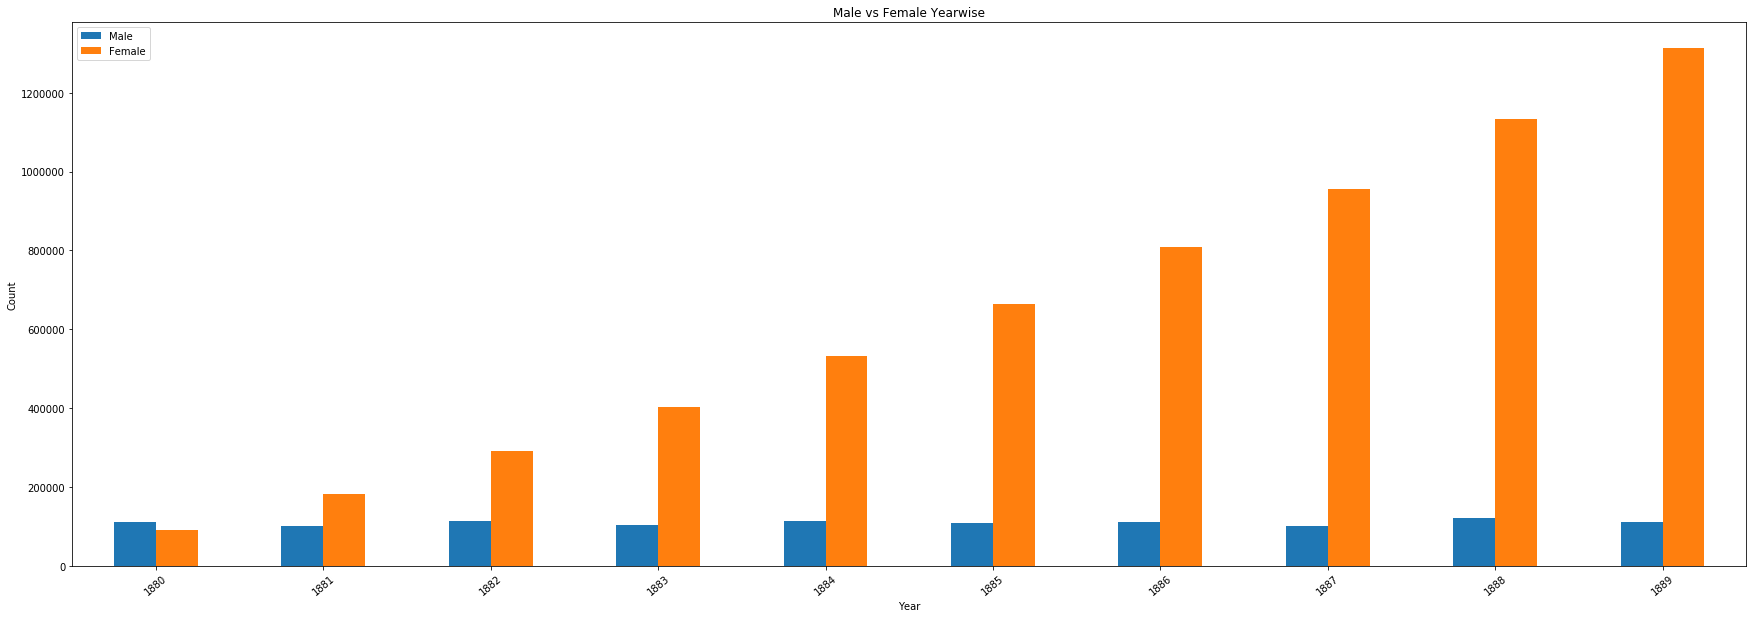

In [9]:
### Multiple barplot comparing male vs female yearwise
dict1={'Year':lst_year[0:10],'Male':tot_male[0:10],'Female':tot_female[0:10]}
df_plot=pd.DataFrame(dict1)
%matplotlib inline
fig=plt.figure(figsize=(30,5))
df_plot.plot.bar(x='Year',y=['Male','Female'],figsize=(30,10),rot=40)
plt.title('Male vs Female Yearwise')
plt.xlabel('Year')
plt.ylabel('Count')

'yob2018.txt'

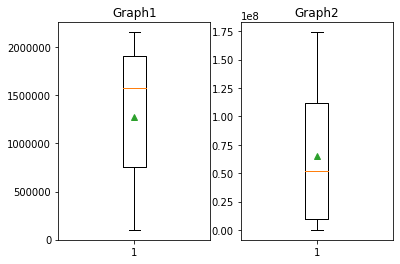

In [118]:
##box plot
dict1={'Year':lst_year[0:10],'Male':tot_male[0:10],'Female':tot_female[0:10]}
plt.subplot(1,2,1)
plt.boxplot(([tot_male]),showmeans=True)
plt.title('Graph1')

plt.subplot(1,2,2)
plt.boxplot(([tot_female]),showmeans=True)
plt.title('Graph2')

In [155]:
#### Sorting the values by count of names yearwise
df=[]
df=pd.DataFrame(data1[0])
df['Count']=pd.to_numeric(pd.Series(df['Count']))  ##convert count column to numeric
# dict3={'Name':df['Name'],'Gender':df['Gender'],'Count':df['Count'],'Year':df['Year']}
# pd.DataFrame(dict3)
df_sortNames=df.sort_values(by=['Count'],ascending=False)
df_sortNames.head(100)
# pd.DataFrame(df_sortNames)
pop_Name=df_sortNames['Name'].iloc[0]
print(pop_Name)
df_sortNames

John


,Name,Gender,Count,Year
942,John,M,9655,1880
943,William,M,9532,1880
0,Mary,F,7065,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
...,...,...,...,...
926,Sannie,F,5,1880
927,Selena,F,5,1880
928,Sibyl,F,5,1880
929,Tella,F,5,1880


In [173]:
###popular names year wise
pop_Names=[]
for i in range(0,len(data1)):
    df=pd.DataFrame(data1[i])
    df['Count']=pd.to_numeric(pd.Series(df['Count']))  ##convert count column to numeric
    df_sortNames=df.sort_values(by=['Count'],ascending=False)
    name=df_sortNames['Name'].iloc[0]
    pop_Names.append([name,lst_year[i]])

pd.DataFrame(pop_Names,columns=['Name','Year'])
df_MostPopName=pd.DataFrame(pop_Names,columns=['Name','Year'])
df_MostPopName['Name'].value_counts()

Mary        49
Michael     44
James       10
Jacob       10
Robert       7
John         5
Emma         4
Sophia       3
Linda        3
Isabella     2
Liam         1
David        1
Name: Name, dtype: int64

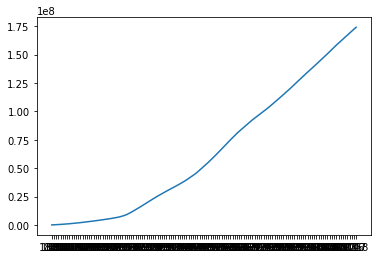

In [163]:
###Male and Female Dataframes wit year
df_male= pd.DataFrame(tot_male)
df_male['Count']= pd.DataFrame(tot_male)
df_male['Year']=lst_year
df_male=df_male[['Count','Year']]
df_male

df_female=pd.DataFrame(tot_female)
df_female['Count']=pd.DataFrame(tot_female)
df_female['Year']=lst_year
df_female=df_female[['Count','Year']]
df_female
plt.plot(df_female['Year'],df_female['Count'])